In [201]:
import sklearn
import pandas
import numpy as np
import sys
from numpy import genfromtxt
from sklearn import linear_model
import matplotlib.pyplot as plt

### Splitting up the test data 
* one array containing the parameters (X)
* one with the output (y)
* Used to find intial examples of (w) 
    
This will put together the expression:

\begin{align}
    min_w ||Xw-y||^2 + \alpha ||w||^2
\end{align}


In [202]:
#import csv file 
# wineQualityRed = csv.reader(open('winequality-red.csv', newline=''), delimiter=';', quotechar='"')
redDat = genfromtxt('winequality-red.csv', delimiter=';', dtype = float)[1:]
whiDat = genfromtxt('winequality-white.csv', delimiter=';', dtype = float)[1:]

# wineQualityRed = list(map(Wine, wineQualityRed[1:]))
# print(redDat[0])
# print(whiDat[0])

#seperate the output from the parameters
whiDatX = [[0 for x in range(11)] for y in range(whiDat.__len__())]
whiDatY = [0 for x in range(whiDat.__len__())]
for i in range (0, whiDat.__len__() -1):
    whiDatX[i] = whiDat[i][0:11]
    whiDatY[i] = whiDat[i][11]

### Original check to see what value results from  alpha = 0.5

In [203]:
areg = linear_model.Ridge (alpha = .5)
reg.fit (whiDatX[:4897], whiDatY[:4897]) #had to force the index because it kept going too high 
W = reg.coef_
print(W)

[-4.95634100e-02 -1.93077217e+00 -2.87951431e-02  2.58150842e-02
 -6.91145926e-01  4.81271928e-03 -8.99114363e-04 -2.94735142e-01
  1.70180554e-01  4.14444315e-01  3.63668392e-01]


### Analyse the effect of alpha on the resulting weight vector

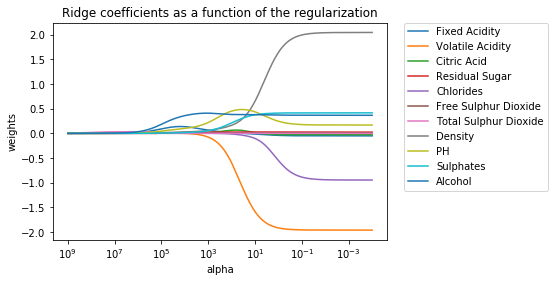

In [204]:
# Compute paths
# #############################################################################
n_alphas = 500
alphas = np.logspace(-4, 9, n_alphas)
# Array for containg the perameters 1-11
#--------0--1--2--3--4--5--6--7--8--9--10
coefs = [[],[],[],[],[],[],[],[],[],[],[]]

for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit (whiDatX[:4897], whiDatY[:4897])
    for x in range(0, 11):
        coefs[x].append(ridge.coef_[x])

# #############################################################################
# Display results
ax = plt.gca()
#attatch key to each set of coeficients
plt.plot(alphas, coefs[0], label = "Fixed Acidity")
plt.plot(alphas, coefs[1], label = "Volatile Acidity")
plt.plot(alphas, coefs[2], label = "Citric Acid")
plt.plot(alphas, coefs[3], label = "Residual Sugar")
plt.plot(alphas, coefs[4], label = "Chlorides")
plt.plot(alphas, coefs[5], label = "Free Sulphur Dioxide")
plt.plot(alphas, coefs[6], label = "Total Sulphur Dioxide")
plt.plot(alphas, coefs[7], label = "Density")
plt.plot(alphas, coefs[8], label = "PH")
plt.plot(alphas, coefs[9], label = "Sulphates")
plt.plot(alphas, coefs[10], label = "Alcohol")
#--------------------------------------------#
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
#plot the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

### Find the most appropriate alpha using cross validation

In [205]:
 ridgeCv = linear_model.RidgeCV(alphas=alphas, fit_intercept = False)
ridgeCv.fit (whiDatX[:4897], whiDatY[:4897])
print(ridgeCv.coef_)
print(ridgeCv.alpha_)


[-4.79446860e-02 -1.94902355e+00 -2.86842970e-02  2.52427896e-02
 -8.18038547e-01  4.81951382e-03 -8.85992078e-04  1.93065621e+00
  1.89431506e-01  4.14428304e-01  3.67196408e-01]
0.22946763672319362


### Plot this to see how the weights are chosen relative to eachother 

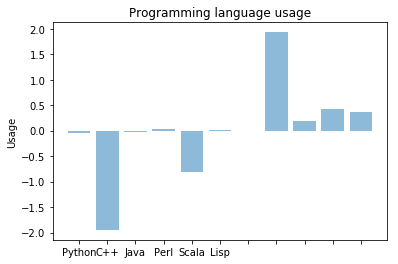

In [221]:
objects = ('Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides', 'Free Sulphur Dioxide', '','','','','')
y_pos = np.arange(len(objects))
ax.set_yscale('log')
plt.bar(y_pos, ridgeCv.coef_, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

In [121]:
#fixed acidity;"volatile acidity";"citric acid";"residual sugar";
#"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
class Wine:
    def __init__(self,params):
        params = list(map(float,params))
        self.fixAcd = params[0]    #fixed acidity
        self.volAcd = params[1]    #volatile acidity
        self.citAcd = params[2]    #citric acid
        self.resSug = params[3]    #residual sugar
        self.chlori = params[4]    #chlorides
        self.fSulDi = params[5]    #free sulfur dioxide
        self.tSulDi = params[6]    #total sulfur dioxide
        self.dens =   params[7]    #density
        self.ph =     params[8]    #pH
        self.sul =    params[9]    #sulphates
        self.alch =   params[10]   #alcohol
        self.qual =   params[11]   #quality
        
tmp = Wine([ 7.4, 0.7 ,0. ,1.9     ,0.076 , 11. ,    34. ,     0.9978 , 3.51,  0.56,    9.4,     5.    ])